In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [321]:
df = pd.read_csv('Housing.csv')

In [322]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [323]:
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [324]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [325]:
df['mainroad'] = df['mainroad'].replace({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].replace({'yes': 1, 'no': 0})
df['basement'] = df['basement'].replace({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].replace({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].replace({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].replace({'yes': 1, 'no': 0})


/var/folders/y3/wvn_6p0s6f933qxhdk0tbp3c0000gn/T/ipykernel_76306/371293109.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['mainroad'] = df['mainroad'].replace({'yes': 1, 'no': 0})
/var/folders/y3/wvn_6p0s6f933qxhdk0tbp3c0000gn/T/ipykernel_76306/371293109.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['guestroom'] = df['guestroom'].replace({'yes': 1, 'no': 0})
/var/folders/y3/wvn_6p0s6f933qxhdk0tbp3c0000gn/T/ipykernel_76306/371293109.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be re

In [326]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [327]:
furnish_dummy = pd.get_dummies(df['furnishingstatus'], prefix='furnishingstatus')
df = pd.concat([df, furnish_dummy], axis=1)

In [328]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,False,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,False,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,False,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,True,False,False


In [329]:
df = df.drop('furnishingstatus', axis=1)

In [330]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,True,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,True,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,False,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,True,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,False,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,True,False,False


In [331]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [332]:
df['price'] = scaler.fit_transform(df[['price']])

In [333]:
df['area'] = scaler.fit_transform(df[['area']])

In [334]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.000000,0.396564,4,2,3,1,0,0,0,1,2,1,True,False,False
1,0.909091,0.502405,4,4,4,1,0,0,0,1,3,0,True,False,False
2,0.909091,0.571134,3,2,2,1,0,1,0,0,2,1,False,True,False
3,0.906061,0.402062,4,2,2,1,0,1,0,1,3,1,True,False,False
4,0.836364,0.396564,4,1,2,1,1,1,0,1,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,2,1,1,1,0,1,0,0,2,0,False,False,True
541,0.001485,0.051546,3,1,1,0,0,0,0,0,0,0,False,True,False
542,0.000000,0.135395,2,1,1,1,0,0,0,0,0,0,False,False,True
543,0.000000,0.086598,3,1,1,0,0,0,0,0,0,0,True,False,False


In [335]:
y = df['price']

In [336]:
y

0      1.000000
1      0.909091
2      0.909091
3      0.906061
4      0.836364
         ...   
540    0.006061
541    0.001485
542    0.000000
543    0.000000
544    0.000000
Name: price, Length: 545, dtype: float64

In [337]:
x = df.drop('price', axis = 1)

In [338]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,0.396564,4,2,3,1,0,0,0,1,2,1,True,False,False
1,0.502405,4,4,4,1,0,0,0,1,3,0,True,False,False
2,0.571134,3,2,2,1,0,1,0,0,2,1,False,True,False
3,0.402062,4,2,2,1,0,1,0,1,3,1,True,False,False
4,0.396564,4,1,2,1,1,1,0,1,2,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,2,1,1,1,0,1,0,0,2,0,False,False,True
541,0.051546,3,1,1,0,0,0,0,0,0,0,False,True,False
542,0.135395,2,1,1,1,0,0,0,0,0,0,False,False,True
543,0.086598,3,1,1,0,0,0,0,0,0,0,True,False,False


In [339]:
## splitting the dataset into train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [340]:
## applying linear regression
from sklearn.linear_model import LinearRegression
lg = LinearRegression()


In [341]:
from sklearn.model_selection import RandomizedSearchCV

In [342]:
parameter = {
    'fit_intercept' : [True,False],
    'copy_X' : [True,False],
    'n_jobs' : [1,2,4,6,10,12],
    'positive' : [True, False]
}

In [343]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [344]:
random_search_MAE = RandomizedSearchCV(
    estimator=lg, 
    param_distributions=parameter,  
    scoring='neg_mean_absolute_error',
    cv=5,
    random_state=42
)

In [345]:
random_search_MAE.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 2, 4, 6, 10, 12],
                                        'positive': [True, False]},
                   random_state=42, scoring='neg_mean_absolute_error')

In [346]:
y_pred = random_search_MAE.best_estimator_.predict(x_test)


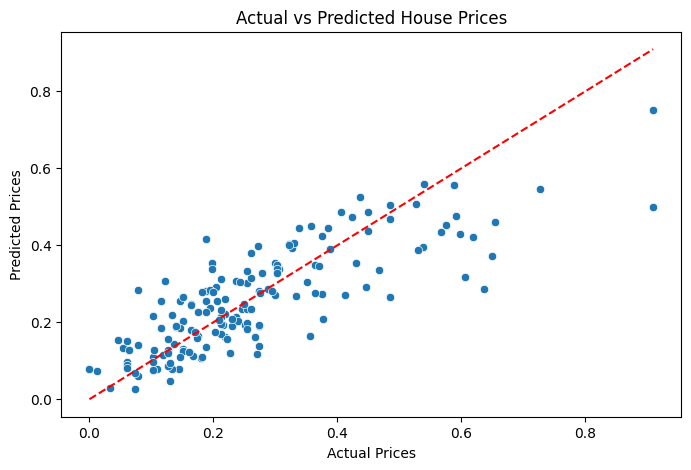

In [347]:
import seaborn as sns
# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

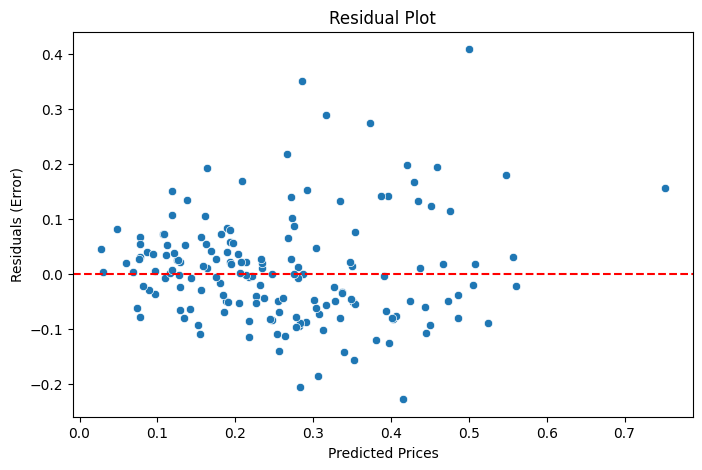

In [348]:

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Error)')
plt.title('Residual Plot')
plt.show()

In [349]:
coefficients = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': random_search_MAE.best_estimator_.coef_})
print(coefficients)

                            Feature  Coefficient
0                              area     0.294300
1                          bedrooms     0.006123
2                         bathrooms     0.083693
3                           stories     0.037354
4                          mainroad     0.027658
5                         guestroom     0.030172
6                          basement     0.034002
7                   hotwaterheating     0.071686
8                   airconditioning     0.080523
9                           parking     0.024766
10                         prefarea     0.057112
11       furnishingstatus_furnished     0.017656
12  furnishingstatus_semi-furnished     0.008370
13     furnishingstatus_unfurnished    -0.026026


In [350]:
random_search_MSE = RandomizedSearchCV(
    estimator=lg, 
    param_distributions=parameter,  
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42
)

In [351]:
random_search_MSE.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 2, 4, 6, 10, 12],
                                        'positive': [True, False]},
                   random_state=42, scoring='neg_mean_squared_error')

In [352]:
y_pred = random_search_MSE.best_estimator_.predict(x_test)

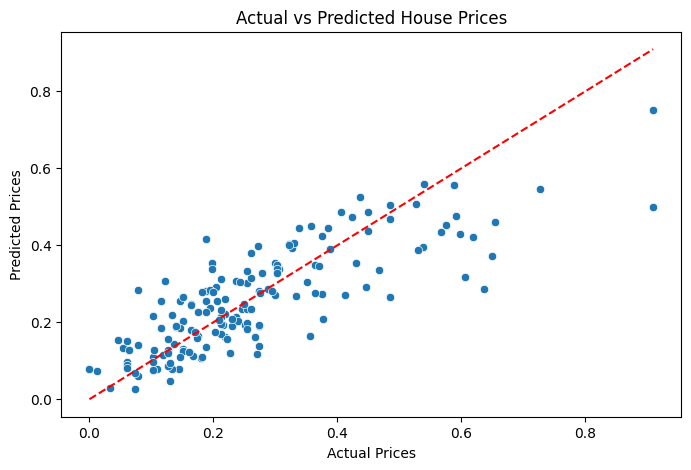

In [353]:
import seaborn as sns
# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

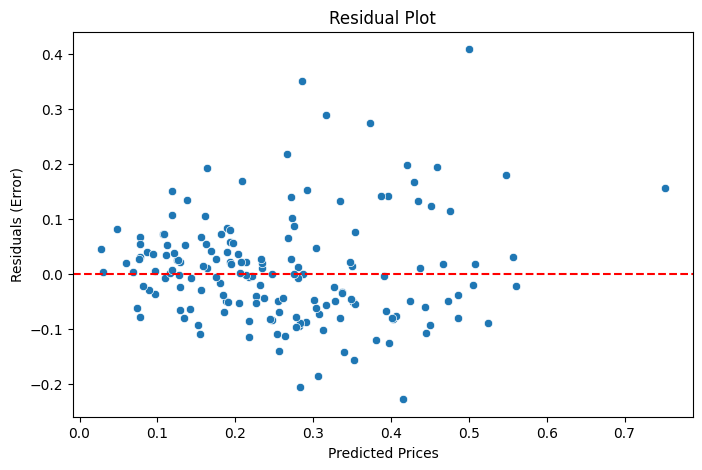

In [354]:

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Error)')
plt.title('Residual Plot')
plt.show()

In [355]:
coefficients = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': random_search_MSE.best_estimator_.coef_})
print(coefficients)

                            Feature  Coefficient
0                              area     0.294300
1                          bedrooms     0.006123
2                         bathrooms     0.083693
3                           stories     0.037354
4                          mainroad     0.027658
5                         guestroom     0.030172
6                          basement     0.034002
7                   hotwaterheating     0.071686
8                   airconditioning     0.080523
9                           parking     0.024766
10                         prefarea     0.057112
11       furnishingstatus_furnished     0.017656
12  furnishingstatus_semi-furnished     0.008370
13     furnishingstatus_unfurnished    -0.026026


In [356]:
random_search_R2score = RandomizedSearchCV(
    estimator=lg, 
    param_distributions=parameter,  
    scoring='r2',
    cv=5,
    random_state=42
)

In [357]:
random_search_R2score.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=LinearRegression(),
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 2, 4, 6, 10, 12],
                                        'positive': [True, False]},
                   random_state=42, scoring='r2')

In [358]:
y_pred = random_search_MSE.best_estimator_.predict(x_test)


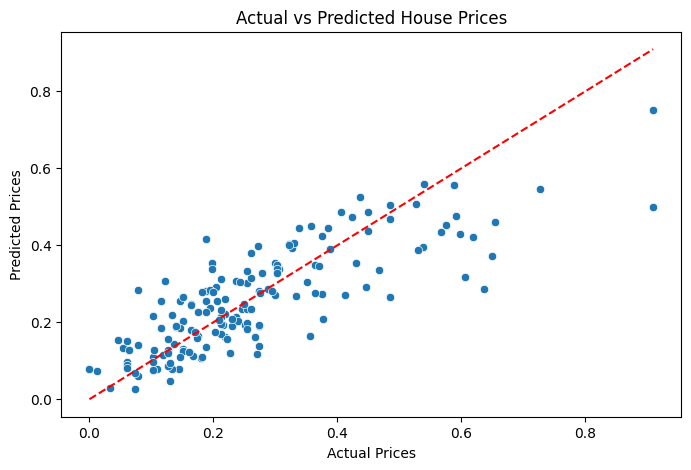

In [359]:
import seaborn as sns
# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

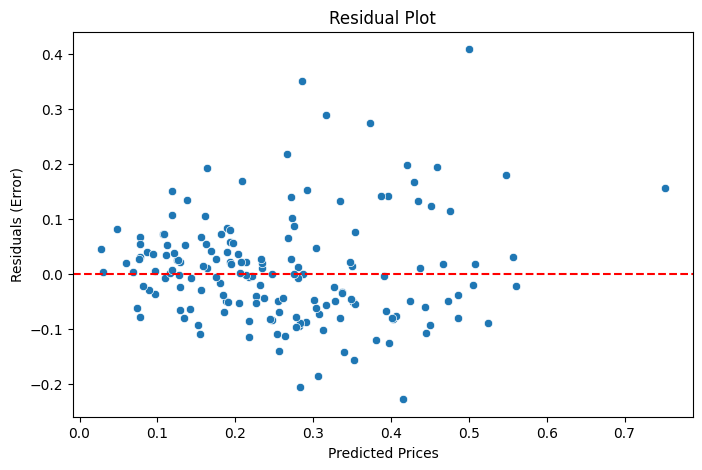

In [360]:

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals (Error)')
plt.title('Residual Plot')
plt.show()

In [361]:
coefficients = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': random_search_R2score.best_estimator_.coef_})
print(coefficients)

                            Feature  Coefficient
0                              area     0.294300
1                          bedrooms     0.006123
2                         bathrooms     0.083693
3                           stories     0.037354
4                          mainroad     0.027658
5                         guestroom     0.030172
6                          basement     0.034002
7                   hotwaterheating     0.071686
8                   airconditioning     0.080523
9                           parking     0.024766
10                         prefarea     0.057112
11       furnishingstatus_furnished     0.017656
12  furnishingstatus_semi-furnished     0.008370
13     furnishingstatus_unfurnished    -0.026026


In [362]:
print(mean_absolute_error(y_pred,y_test))

0.0720030305673252


In [363]:
print(mean_squared_error(y_pred,y_test))

0.009545360085299588


In [364]:
print(r2_score(y_pred,y_test))

0.44926154336177226
